In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [5]:
#reading the csv file
dataset = pd.read_csv('liner.csv')

In [6]:
dataset.shape

(25, 2)

In [7]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


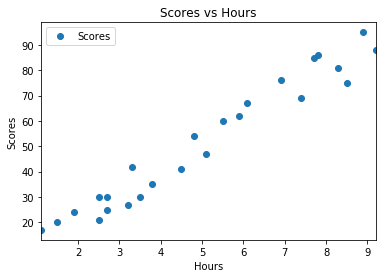

In [12]:
dataset.plot(x = 'Hours', y = 'Scores', style = 'o')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Scores vs Hours')
plt.show()

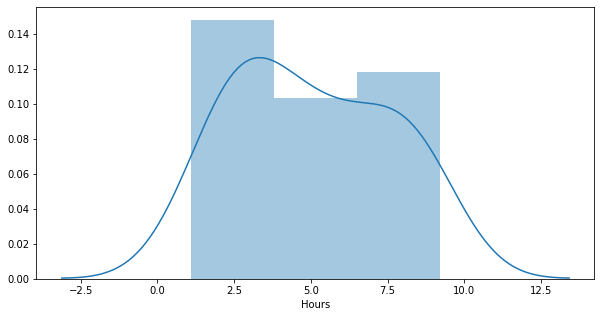

In [17]:
plt.figure(figsize=(10,5))
plt.tight_layout()
seabornInstance.distplot(dataset['Hours'])

In [18]:
#declaring attributes and labels
X = dataset['Hours'].values.reshape(-1,1)
y = dataset['Scores'].values.reshape(-1,1)

In [22]:
#splitting the data into training and test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

20


In [20]:
#training the algorithm
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
#To retrieve the intercept:
print(regressor.intercept_)

#For retrieving the slope:
print(regressor.coef_)

[2.01816004]
[[9.91065648]]


In [24]:
y_pred = regressor.predict(X_test)

In [36]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df


,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


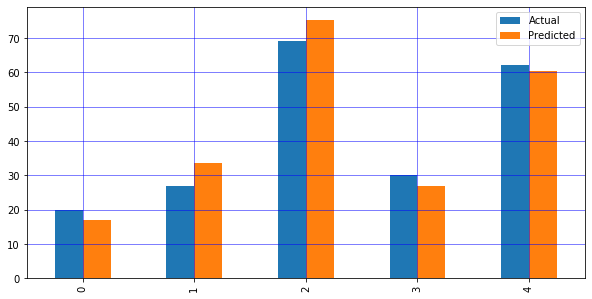

In [28]:
#plot for predicted and actual 
df1 = df.head(25)
df1.plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='blue')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

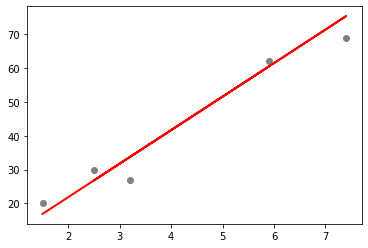

In [29]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [41]:
accuracy = regressor.score(X_test, y_test)
print("accuracy of model:", accuracy*100,'%')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

accuracy of model: 94.54906892105356 %
Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665
